In [11]:
import torch
import numpy as np

tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [37]:
tensor = torch.tensor([[1,2,1,2],[4,3,2,1],[1,0,1,9],[2,3,4,1]], dtype=torch.float32)
print('First row: ', tensor[0])
print('First column: ', tensor[..., 0])
print('Last column: ', tensor[:, -1])

First row:  tensor([1., 2., 1., 2.])
First column:  tensor([1., 4., 1., 2.])
Last column:  tensor([2., 1., 9., 1.])


In [38]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2.],
        [4., 3., 2., 1., 4., 3., 2., 1., 4., 3., 2., 1.],
        [1., 0., 1., 9., 1., 0., 1., 9., 1., 0., 1., 9.],
        [2., 3., 4., 1., 2., 3., 4., 1., 2., 3., 4., 1.]])


In [41]:
y1 = tensor * tensor.T # element-wise
y1 = tensor.mul(tensor) # element-wise
torch.mul(tensor, tensor, out=y1) # element-wise
y2 = tensor @ tensor.T # matmul
y2 = tensor.matmul(tensor.T) # matmul
print(y2)

y3 = torch.rand_like(tensor)
print(y3)
torch.matmul(tensor, tensor.T, out=y3)
print(y3)

tensor([[10., 14., 20., 14.],
        [14., 30., 15., 26.],
        [20., 15., 83., 15.],
        [14., 26., 15., 30.]])
tensor([[0.9635, 0.1176, 0.0066, 0.0709],
        [0.5982, 0.3380, 0.0902, 0.0642],
        [0.7145, 0.0765, 0.9571, 0.9261],
        [0.8332, 0.8450, 0.7736, 0.9200]])
tensor([[10., 14., 20., 14.],
        [14., 30., 15., 26.],
        [20., 15., 83., 15.],
        [14., 26., 15., 30.]])


In [44]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

37.0 <class 'float'>


In [46]:
# in place operations are suffixed with `_`
tensor.add_(5)
print(tensor)
# in place saves memory, but messes up computing derivatives
# (immediate loss of history)

tensor([[11., 12., 11., 12.],
        [14., 13., 12., 11.],
        [11., 10., 11., 19.],
        [12., 13., 14., 11.]])


In [48]:
# loading a dataset
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

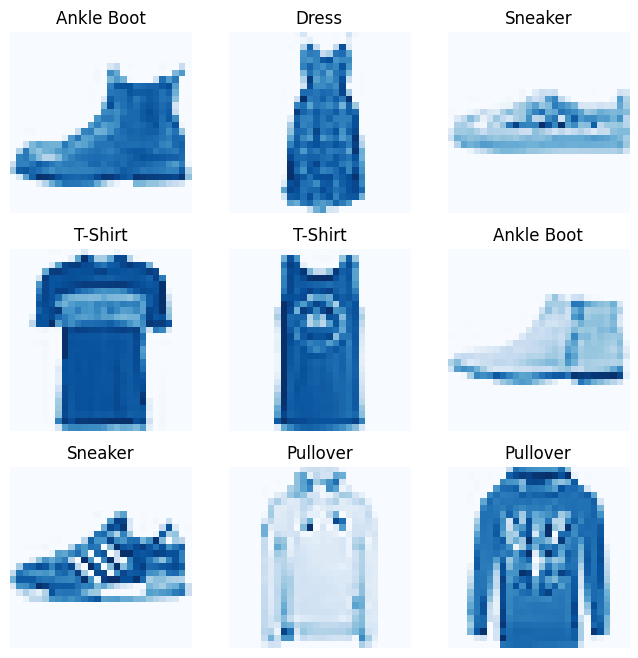

In [57]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="Blues")
plt.show()


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Image before squeeze: torch.Size([1, 28, 28])
Image after squeeze: torch.Size([28, 28])


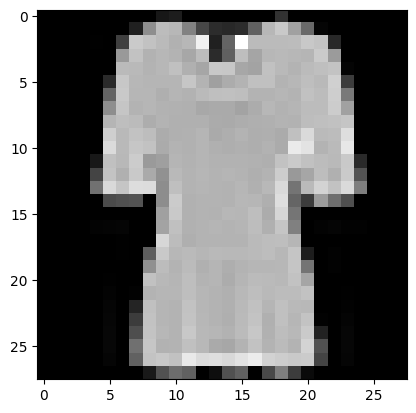

Label: 6


In [76]:
"""
a custom dataset must implement three functions:
__init__
__len__
__getitem__
"""
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    # in the case of FashionMNIST, images are stored in img_dir and labels are stored
    # separately in a CSV file
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    
from torch.utils.data import DataLoader

# we're loading the datasets into the dataloader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# before squeeze, feature has shape 1, 28, 28
print(f"Image before squeeze: {train_features[0].size()}")
img = train_features[0].squeeze()
# after squeeze, feature has shape 28, 28
print(f"Image after squeeze: {img.size()}")
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")